In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
from sklearn import tree

In [5]:
clf = tree.DecisionTreeClassifier()

In [7]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [16]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [11]:
scores = cross_val_score(clf, x, y, cv=10)

In [12]:
print(scores)

[0.67532468 0.72727273 0.67532468 0.58441558 0.7012987  0.67532468
 0.81818182 0.81818182 0.68421053 0.72368421]


In [19]:
scores = cross_validate(clf, x, y,scoring='precision_macro', cv=10,return_estimator=True)

In [20]:
scores

{'fit_time': array([0.00899887, 0.00899911, 0.00799847, 0.00900197, 0.01199937,
        0.00999117, 0.00699782, 0.00499916, 0.00499988, 0.00500035]),
 'score_time': array([0.00400233, 0.0040009 , 0.00500059, 0.00500154, 0.00400066,
        0.00500035, 0.00300002, 0.00300312, 0.00300145, 0.00200033]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.62538462, 0.7       , 0.68893678, 0.57222222, 0.68647913,
        0.73156028, 0.81598793, 0.75765306, 0.5877193 , 0.70769231])}

In [23]:
y_pred = scores["estimator"][6].predict(x)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
print(confusion_matrix(y,y_pred))

[[494   6]
 [  7 261]]


In [26]:
print(accuracy_score(y,y_pred))

0.9830729166666666


In [27]:
xyz = scores["estimator"][6]

[Text(566.1544296116505, 875.8, 'X[1] <= 154.5\ngini = 0.454\nsamples = 691\nvalue = [450, 241]'),
 Text(305.01516990291265, 815.4, 'X[7] <= 30.5\ngini = 0.386\nsamples = 581\nvalue = [429, 152]'),
 Text(181.99332524271844, 755.0, 'X[1] <= 117.5\ngini = 0.258\nsamples = 342\nvalue = [290, 52]'),
 Text(133.17961165048544, 694.6, 'X[5] <= 45.35\ngini = 0.145\nsamples = 229\nvalue = [211, 18]'),
 Text(124.1504854368932, 634.2, 'X[0] <= 6.5\ngini = 0.124\nsamples = 226\nvalue = [211, 15]'),
 Text(81.2621359223301, 573.8, 'X[6] <= 0.67\ngini = 0.11\nsamples = 222\nvalue = [209, 13]'),
 Text(49.66019417475729, 513.4000000000001, 'X[5] <= 30.95\ngini = 0.069\nsamples = 195\nvalue = [188, 7]'),
 Text(40.63106796116505, 453.0, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(58.689320388349515, 453.0, 'X[5] <= 31.1\ngini = 0.162\nsamples = 79\nvalue = [72, 7]'),
 Text(49.66019417475729, 392.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(67.71844660194175, 392.6, 'X[4] <= 36.5\ngini =

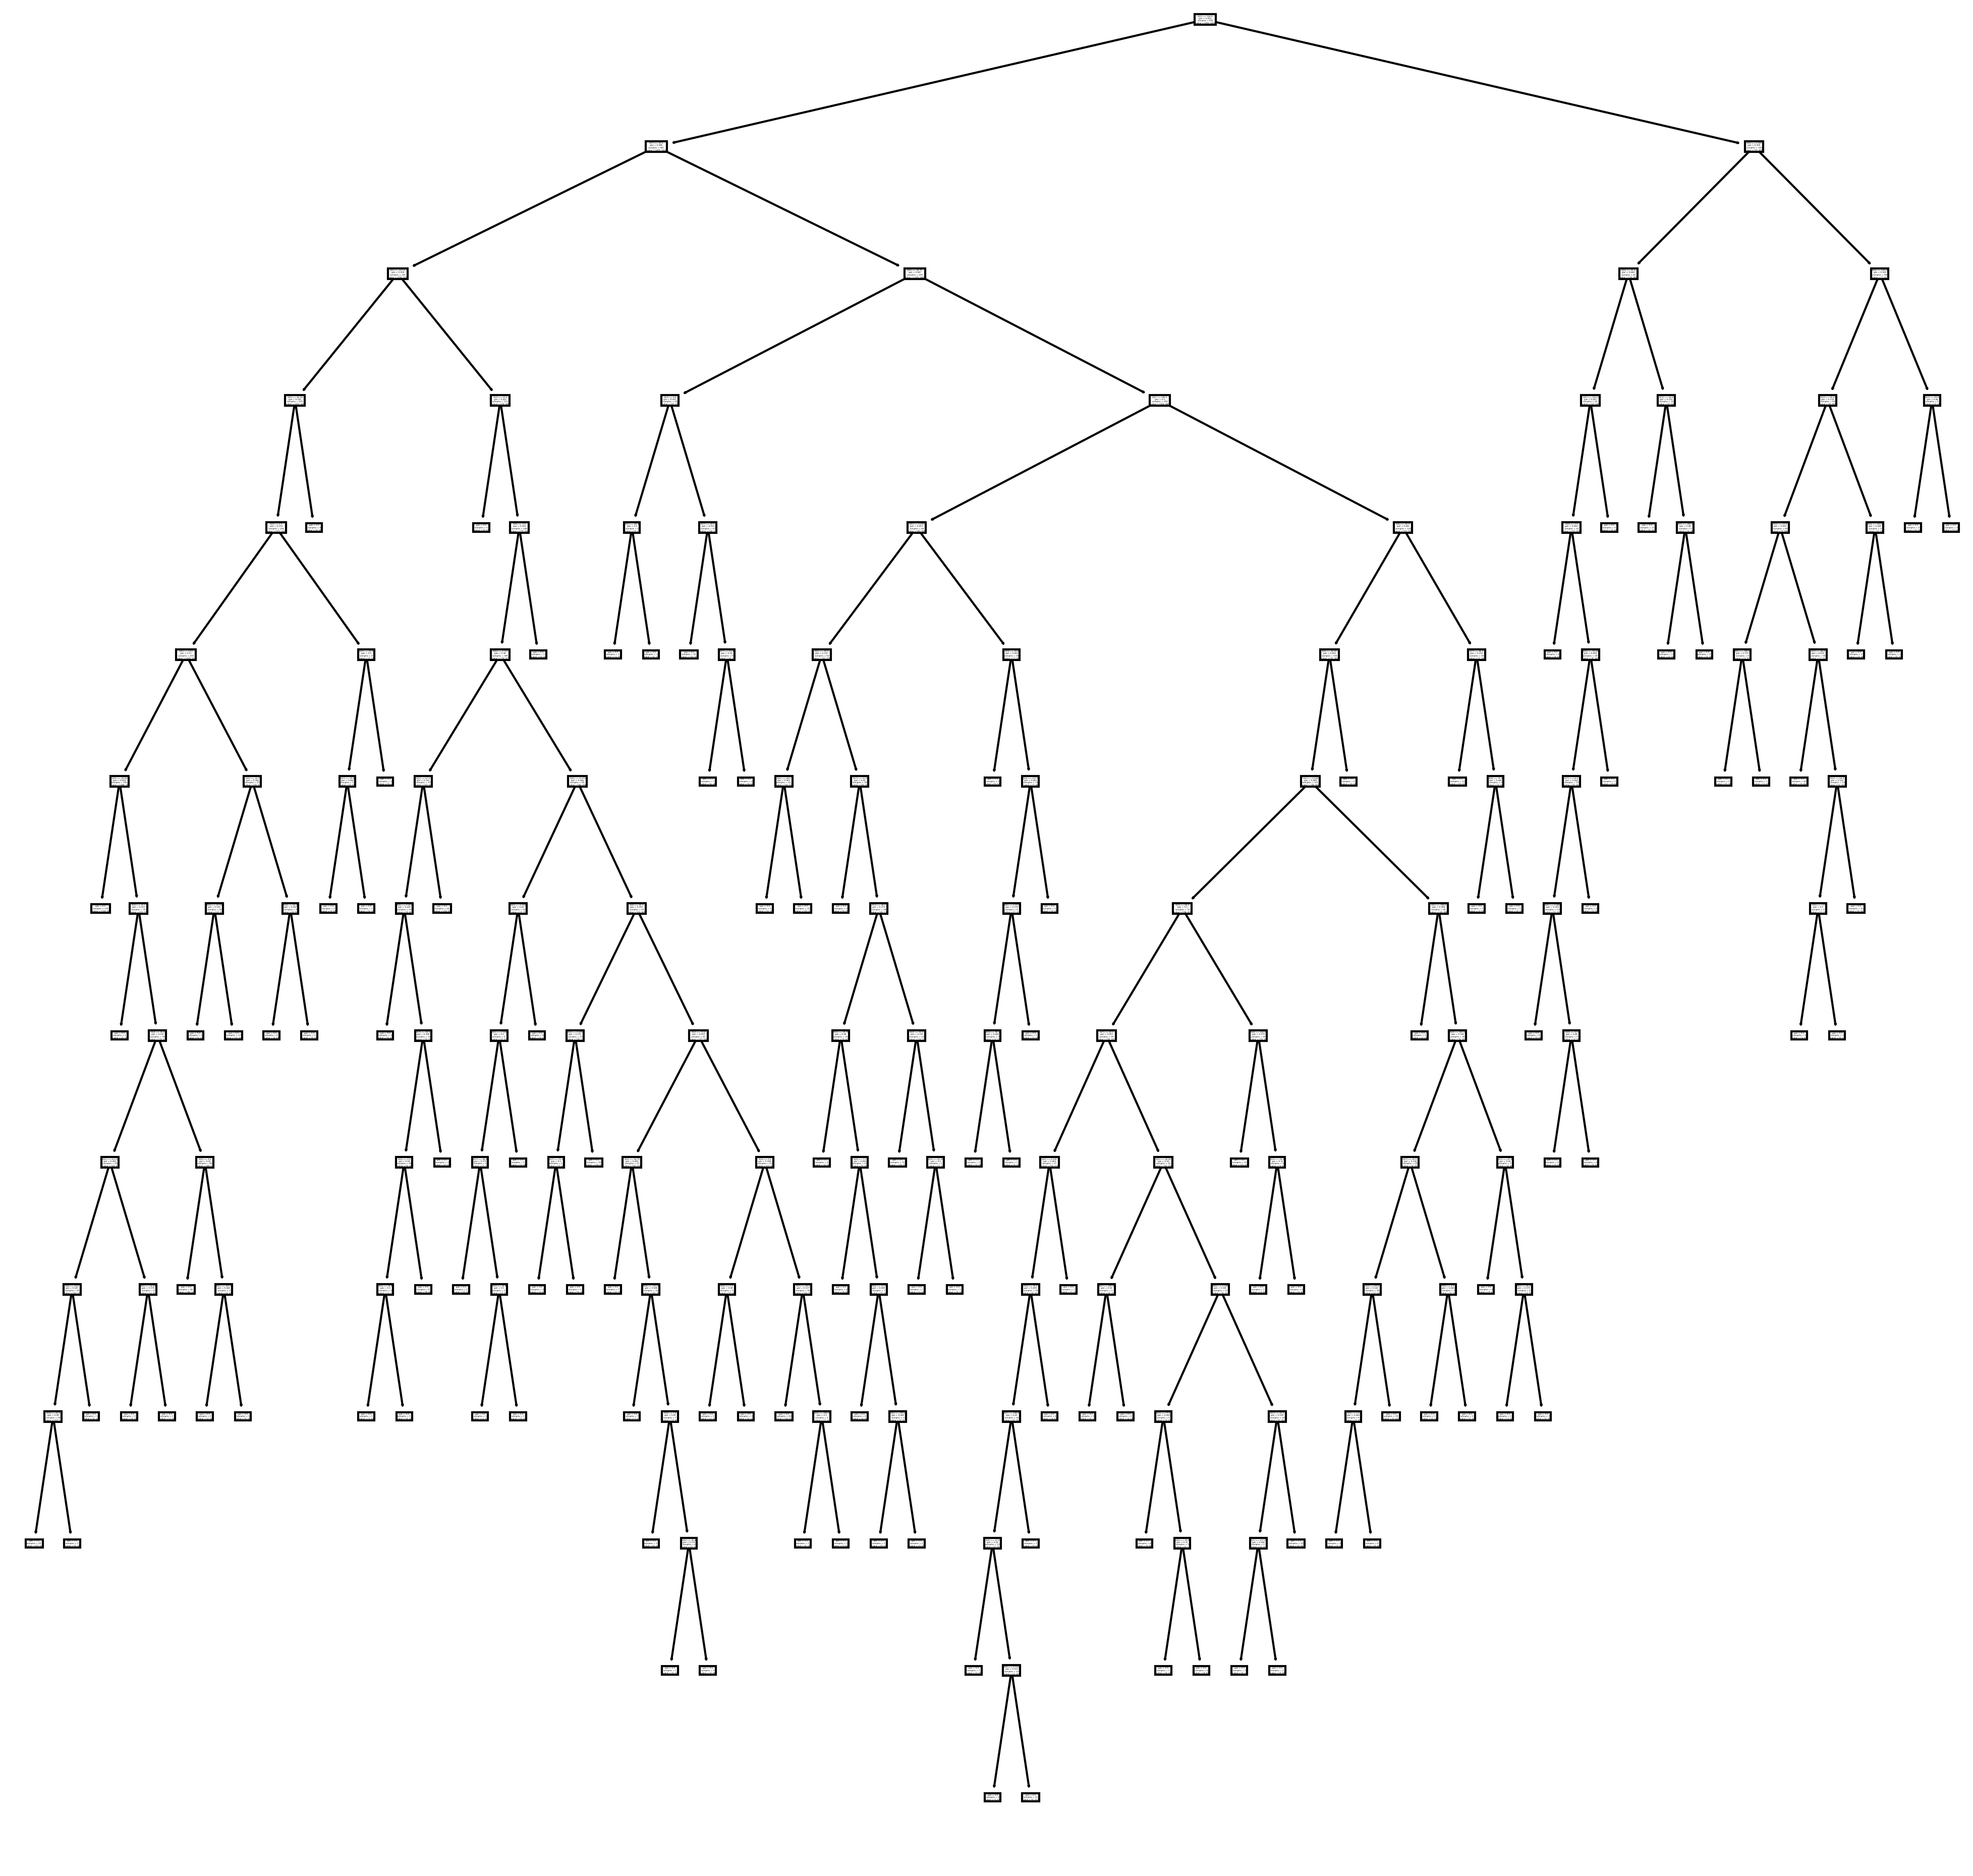

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(xyz)
# fig.savefig('images/decisionTree.png')

In [33]:
import scipy.stats as st

In [36]:
st.t.interval(alpha=0.95, df=len(scores["test_score"])-1,
              loc=np.mean(scores["test_score"]),
              scale=st.sem(scores["test_score"]))

(0.6334911323513837, 0.7412359941602171)